# Resolution, fap fraction and LAI

finished!
The gap fraction at the spatial resolution of 0.01m is 0.7029774828620916
finished!
The gap fraction at the spatial resolution of 0.04m is 0.3292753623188406
finished!
The gap fraction at the spatial resolution of 0.06999999999999999m is 0.30069930069930073
finished!
The gap fraction at the spatial resolution of 0.09999999999999999m is 0.27053140096618356
finished!
The gap fraction at the spatial resolution of 0.13m is 0.2678571428571429
finished!
The gap fraction at the spatial resolution of 0.16m is 0.2563718140929535
finished!
The gap fraction at the spatial resolution of 0.19m is 0.23789473684210527
finished!
The gap fraction at the spatial resolution of 0.22m is 0.2324929971988795
finished!
The gap fraction at the spatial resolution of 0.25m is 0.23859649122807014
finished!
The gap fraction at the spatial resolution of 0.28m is 0.2171945701357466
finished!
The gap fraction at the spatial resolution of 0.31m is 0.18333333333333335
finished!
The gap fraction at the spatial

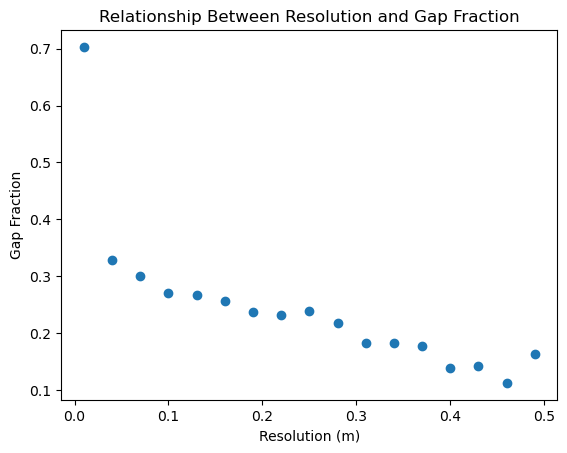

In [1]:
import math
import os
import numpy as np

x, y, z = 0, 0, 0
X_max = -0xfffffff
Y_max = -0xfffffff
X_min = 0xfffffff
Y_min = 0xfffffff
X_cor = 0
Y_cor = 0
temp = 0

pc = [[0 for i in range(2)] for j in range(10000000)]
resolution = 0

res = np.arange(0.01, 0.5, 0.03)
gf = res*0
n = 0

for r in res:
    resolution = r
    output_data_attribute = open("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree1_output_data_attribute_resolution_" + str(resolution) + ".txt", "w")
    output_data_mapping = open("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree1_output_data_mapping_resolution_" + str(resolution) + ".txt", "w")

    with open("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree1.txt") as input_file:
        num = 0
        for line in input_file:
            data = line.split()
            x, y, z = float(data[0]), float(data[1]), float(data[2])
            pc[num][0] = x
            pc[num][1] = y
            num += 1
            if x > X_max:
                X_max = x
            if y > Y_max:
                Y_max = y
            if x < X_min:
                X_min = x
            if y < Y_min:
                Y_min = y

    input_file.close()

    X_length = int(math.ceil((X_max - X_min) / resolution))
    Y_length = int(math.ceil((Y_max - Y_min) / resolution))

    output_data_attribute.write("Input the point cloud file path as\n")
    output_data_attribute.write("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree1.txt\n\n")
    output_data_attribute.write("Number of points is " + str(num) + "\n")
    output_data_attribute.write("The minimum value of the point cloud x-coordinate is " + str(X_min) + "\n")
    output_data_attribute.write("The maximum value of the point cloud x-coordinate is " + str(X_max) + "\n")
    output_data_attribute.write("The minimum value of the point cloud y-coordinate is " + str(Y_min) + "\n")
    output_data_attribute.write("The maximum value of the point cloud y-coordinate is " + str(Y_max) + "\n")
    output_data_attribute.write("The raster spatial resolution is " + str(resolution) + "\n")
    output_data_attribute.write("The raster size is " + str(X_length) + "*" + str(Y_length) + "\n")
    output_data_attribute.close()

    GF_map = [[0 for i in range(Y_length)] for j in range(X_length)]

    for i in range(X_length):
        for j in range(Y_length):
            GF_map[i][j] = 0

    for i in range(num):
        X_cor = math.floor((pc[i][0] - X_min) / resolution)
        Y_cor = math.floor((pc[i][1] - Y_min) / resolution)
        GF_map[X_cor][Y_cor] = 1

    count = 0
    for i in range(X_length):
        for j in range(Y_length):
            output_data_mapping.write(str(GF_map[i][j]) + " ")
            if GF_map[i][j] == 1:
                count += 1
        output_data_mapping.write("\n")

    output_data_mapping.close()

    gf[n] = 1 - 1.0 * count / (Y_length * X_length)

    print("finished!")
    print("The gap fraction at the spatial resolution of " + str(resolution) + "m is " + str(gf[n]))
    
    n = n+1
    del GF_map

import matplotlib.pyplot as plt

# The gap fraction values for each resolution
gf_values = [0.78, 0.82, 0.85, 0.92, 0.98, 0.99, 0.99]

# The resolutions used to compute the gap fractions
resolutions = [1.0, 0.8, 0.65, 0.3, 0.01, 0.005, 0.001]

# Create a scatter plot of the gap fraction values versus resolutions
plt.scatter(res, gf)

# Set the x-axis and y-axis labels and title
plt.xlabel('Resolution (m)')
plt.ylabel('Gap Fraction')
plt.title('Relationship Between Resolution and Gap Fraction')

# Show the plot
plt.show()



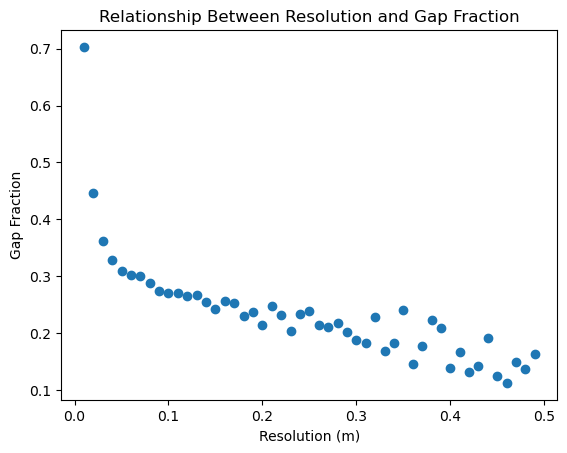

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data = np.loadtxt("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree1.txt", usecols=(0, 1, 2))

# Compute X and Y limits
X_min, X_max = np.min(data[:, 0]), np.max(data[:, 0])
Y_min, Y_max = np.min(data[:, 1]), np.max(data[:, 1])

# Compute gap fraction for different resolutions
res = np.arange(0.01, 0.5, 0.01)
gf = np.zeros_like(res)
for i, r in enumerate(res):
    X_length = int(np.ceil((X_max - X_min) / r))
    Y_length = int(np.ceil((Y_max - Y_min) / r))
    GF_map = np.zeros((X_length, Y_length))
    X_cor = np.floor((data[:, 0] - X_min) / r).astype(int)
    Y_cor = np.floor((data[:, 1] - Y_min) / r).astype(int)
    GF_map[X_cor, Y_cor] = 1
    gf[i] = 1 - np.sum(GF_map) / (X_length * Y_length)

# Plot gap fraction versus resolution
plt.plot(res, gf, 'o')
plt.xlabel('Resolution (m)')
plt.ylabel('Gap Fraction')
plt.title('Relationship Between Resolution and Gap Fraction')
plt.show()


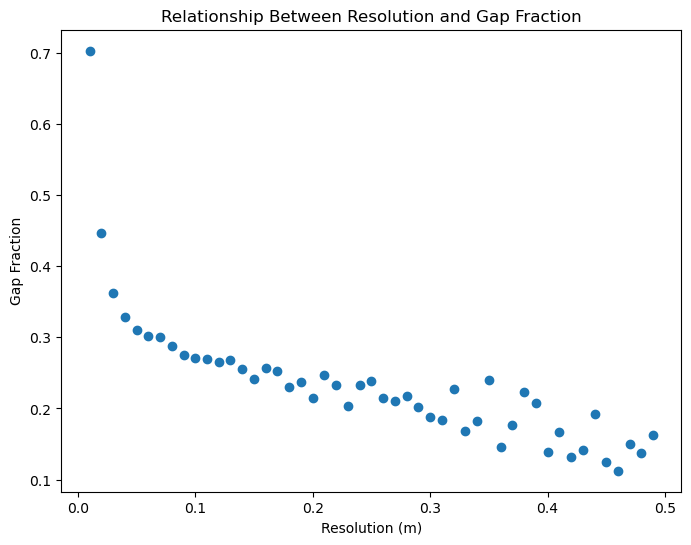

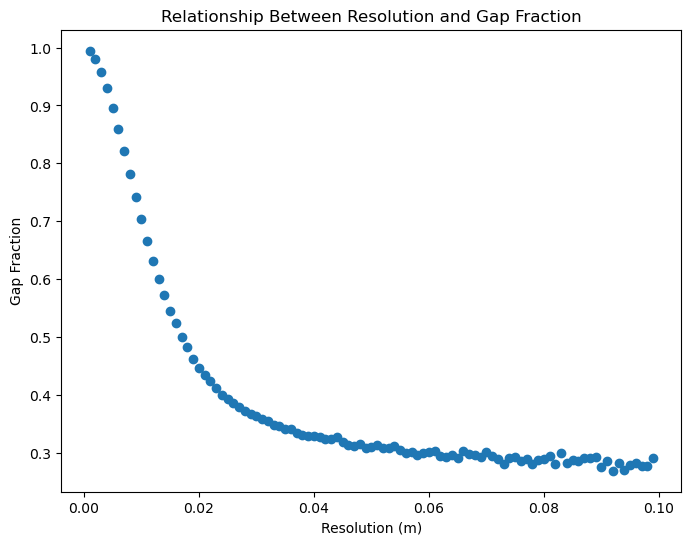

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gap_fraction(data, res):
    # Compute X and Y limits
    X_min, X_max = np.min(data[:, 0]), np.max(data[:, 0])
    Y_min, Y_max = np.min(data[:, 1]), np.max(data[:, 1])

    # Compute gap fraction for different resolutions
    gf = np.zeros_like(res)
    for i, r in enumerate(res):
        X_length = int(np.ceil((X_max - X_min) / r))
        Y_length = int(np.ceil((Y_max - Y_min) / r))
        GF_map = np.zeros((X_length, Y_length))
        X_cor = np.floor((data[:, 0] - X_min) / r).astype(int)
        Y_cor = np.floor((data[:, 1] - Y_min) / r).astype(int)
        GF_map[X_cor, Y_cor] = 1
        gf[i] = 1 - np.sum(GF_map) / (X_length * Y_length)

    # Plot gap fraction versus resolution
    fig = plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(res, gf, 'o')
    plt.xlabel('Resolution (m)')
    plt.ylabel('Gap Fraction')
    plt.title('Relationship Between Resolution and Gap Fraction')
    plt.show()
    
res = np.arange(0.01, 0.5, 0.01)
plot_gap_fraction(data, res)

res = np.arange(0.001, 0.1, 0.001)
plot_gap_fraction(data, res)

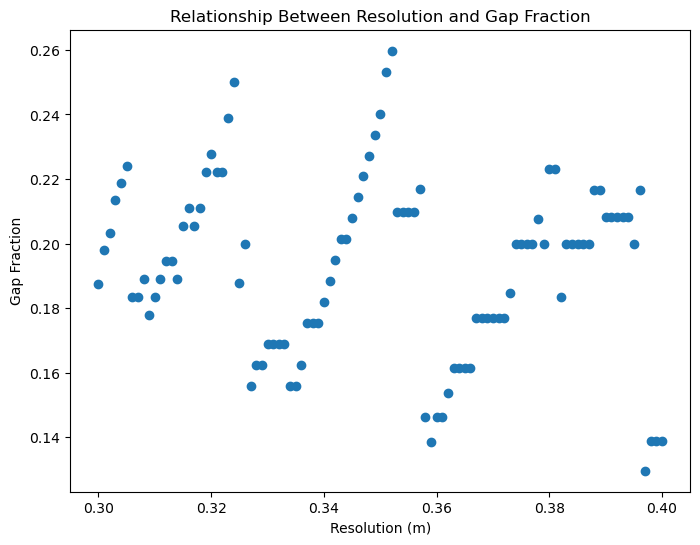

In [4]:
res = np.arange(0.3, 0.4, 0.001)
plot_gap_fraction(data, res)

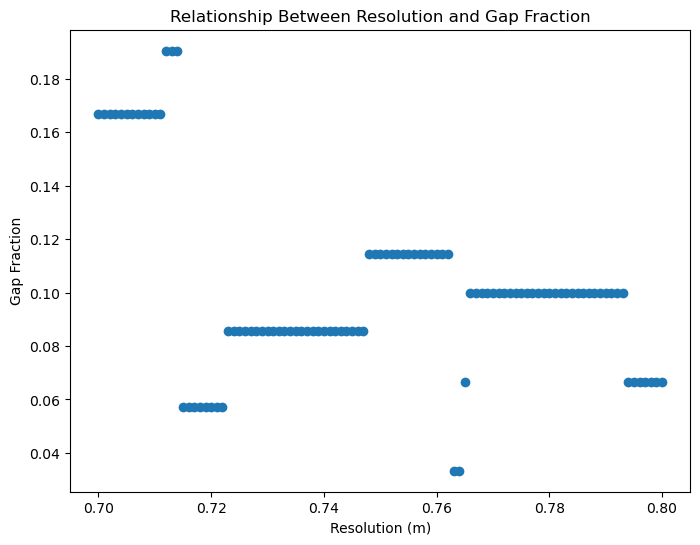

In [5]:
res = np.arange(0.7, 0.8, 0.001)
plot_gap_fraction(data, res)

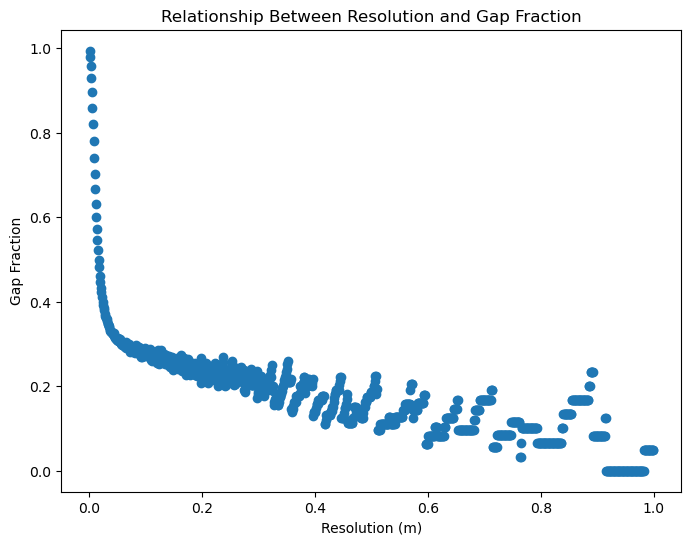

In [6]:
res = np.arange(0.001, 1.0, 0.001)
plot_gap_fraction(data, res)

Leaf area index (LAI) is widely used to describe the photosynthetic and transpirational surface of
plant canopies. LAI can be simply defined as the amount of leaf surface area per unit ground
area, and has broad applications in ecophysiology, water balance modeling, and characterization
of vegetation-atmosphere interactions. LAI values are calculated following a simple attenuation
law: 

GAP_FRACTION(theta) = e^ -[G(theta) LAI / cos(theta)]

https://upload.wikimedia.org/wikipedia/commons/a/a1/Hemispherical_photography_laicalc_manual_1995.pdf

note that the LAI here is effective LAI

In [7]:
# since the theta here is 0
# then we have:
import math

gap_fraction = 0.2
G = 0.7 # extinction coefficient
e = 5 # maximum projected area of a single leaf in the canopy

LAI = -math.log(gap_fraction) / G
print('LAI =', LAI)

LAI = 2.2991970177630003


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_res_eLAI(data, res, G):
    # G is the extinction coefficient
    # Compute X and Y limits
    X_min, X_max = np.min(data[:, 0]), np.max(data[:, 0])
    Y_min, Y_max = np.min(data[:, 1]), np.max(data[:, 1])

    # Compute gap fraction for different resolutions
    gf = np.zeros_like(res)
    eLAI = np.zeros_like(res)
    
    for i, r in enumerate(res):
        X_length = int(np.ceil((X_max - X_min) / r))
        Y_length = int(np.ceil((Y_max - Y_min) / r))
        GF_map = np.zeros((X_length, Y_length))
        X_cor = np.floor((data[:, 0] - X_min) / r).astype(int)
        Y_cor = np.floor((data[:, 1] - Y_min) / r).astype(int)
        GF_map[X_cor, Y_cor] = 1
        gf[i] = 1 - np.sum(GF_map) / (X_length * Y_length)
        if gf[i] < 1e-6:
            eLAI[i] = np.nan
        else:
            eLAI[i] = -1* math.log(gf[i]) / G

    # Plot gap fraction versus resolution
    fig = plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(res, eLAI, 'o')
    plt.xlabel('Resolution (m)')
    plt.ylabel('Effective Leaf Area Index')
    plt.title('Relationship Between Resolution and Effective Leaf Area Index')
    plt.show()

When the G is 1.0


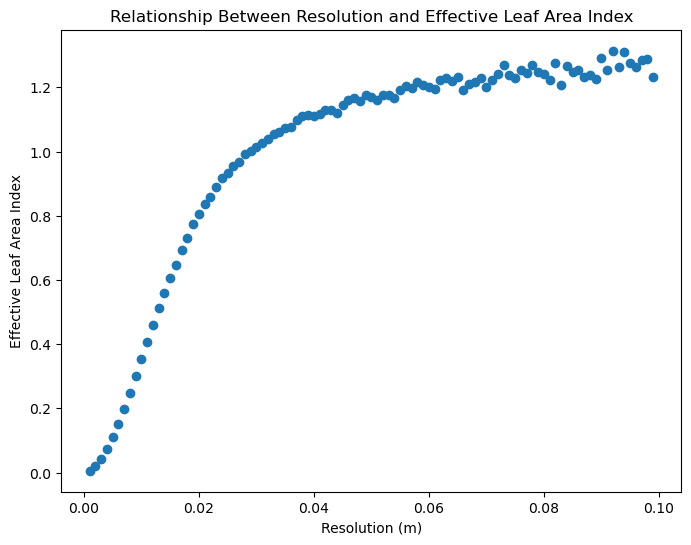

In [9]:
res = np.arange(0.001, 0.1, 0.001)
print("When the G is 1.0")
plot_res_eLAI(data, res, 1.0)

When the G is 0.7


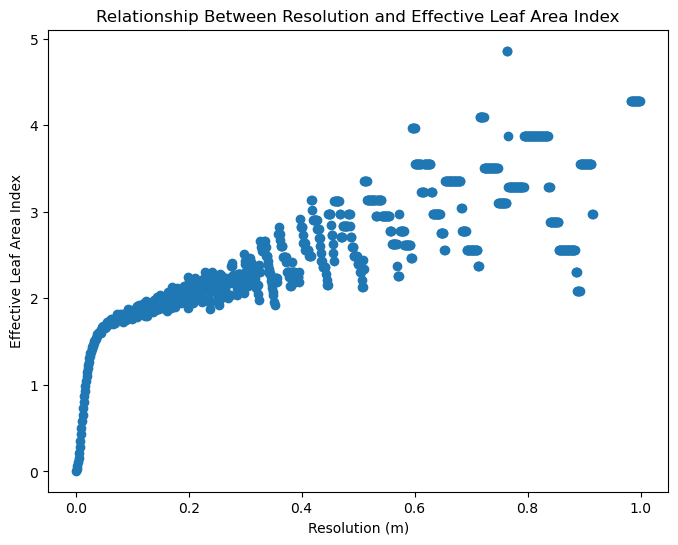

In [10]:
res = np.arange(0.001, 1.0, 0.001)
print("When the G is 0.7")
plot_res_eLAI(data, res, 0.7)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_res_GFandeLAI(data, res, G):
    # G is the extinction coefficient
    # Compute X and Y limits
    X_min, X_max = np.min(data[:, 0]), np.max(data[:, 0])
    Y_min, Y_max = np.min(data[:, 1]), np.max(data[:, 1])

    # Compute gap fraction and LAI for different resolutions
    gf = np.zeros_like(res)
    eLAI = np.zeros_like(res)
    for i, r in enumerate(res):
        X_length = int(np.ceil((X_max - X_min) / r))
        Y_length = int(np.ceil((Y_max - Y_min) / r))
        GF_map = np.zeros((X_length, Y_length))
        X_cor = np.floor((data[:, 0] - X_min) / r).astype(int)
        Y_cor = np.floor((data[:, 1] - Y_min) / r).astype(int)
        GF_map[X_cor, Y_cor] = 1
        gf[i] = 1 - np.sum(GF_map) / (X_length * Y_length)
        if gf[i] <= 0:
            eLAI[i] = np.nan
        else:
            eLAI[i] = -math.log(gf[i]) / G

    # Plot gap fraction and effective LAI versus resolution
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.plot(res, gf, 'o', label='Gap Fraction')
    ax.set_xlabel('Resolution (m)')
    ax.set_ylabel('Gap Fraction')
    ax2 = ax.twinx()
    ax2.plot(res, eLAI, 'o', color='tab:red', label='Effective LAI')
    ax2.set_ylabel('Effective LAI')
    ax2.set_title('Relationship Between Resolution and Gap Fraction/Effective LAI')
    fig.legend()
    plt.show()


When the G is 0.7


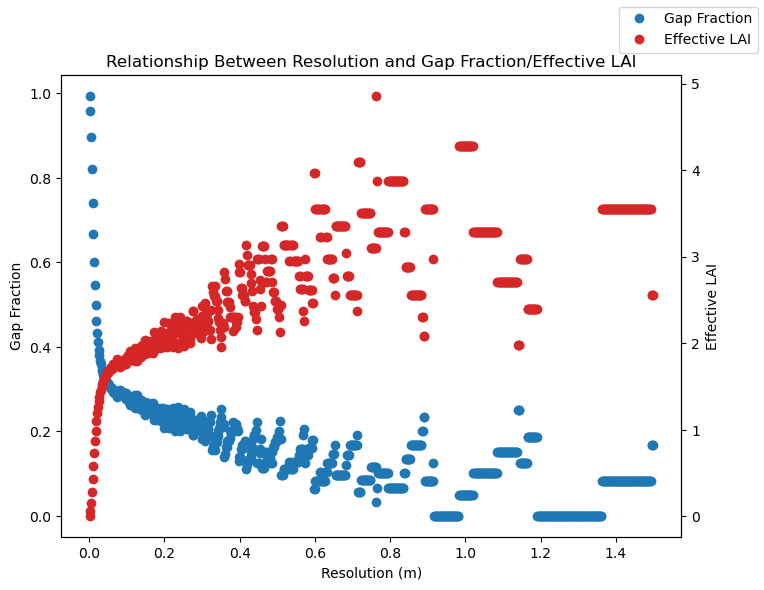

When the G is 1.0


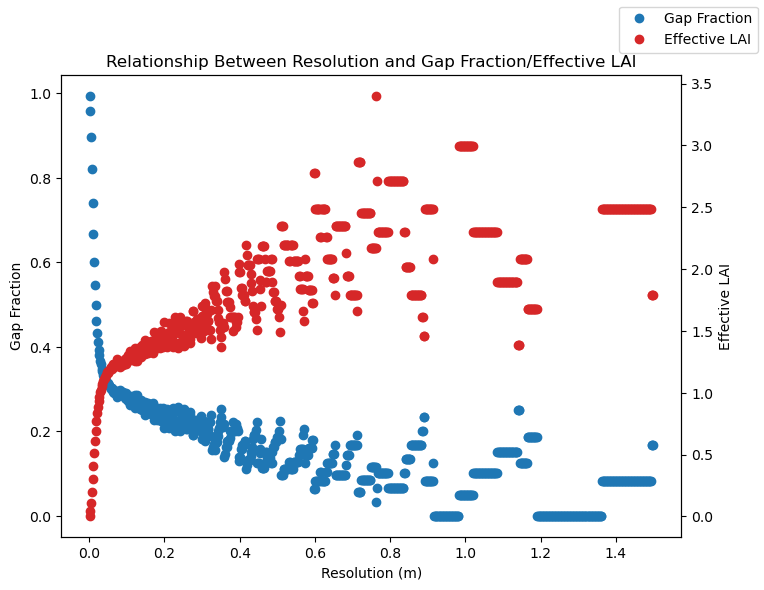

In [12]:
res = np.arange(0.001, 1.5, 0.002)
print("When the G is 0.7")
plot_res_GFandeLAI(data, res, 0.7)

res = np.arange(0.001, 1.5, 0.002)
print("When the G is 1.0")
plot_res_GFandeLAI(data, res, 1.0)

The GF and LAI will be much more stable if we treat the point in the point cloud as a entity with surface area instead of a point.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_lai_and_gf_area(data, res, G):
    # G is the extinction coefficient
    # Compute X and Y limits
    X_min, X_max = np.min(data[:, 0]), np.max(data[:, 0])
    Y_min, Y_max = np.min(data[:, 1]), np.max(data[:, 1])

    # Compute gap fraction and effective LAI for different resolutions
    gf = np.zeros_like(res)
    eLAI = np.zeros_like(res)
    for i, r in enumerate(res):
        X_length = int(np.ceil((X_max - X_min) / r))
        Y_length = int(np.ceil((Y_max - Y_min) / r))
        GF_map = np.zeros((X_length, Y_length))
        x = data[:, 0]
        y = data[:, 1]
        x_min = x - 0.01
        x_min[x_min < X_min] = X_min
        x_max = x + 0.01
        x_max[x_max > X_max] = X_max
        y_min = y - 0.01
        y_min[y_min < Y_min] = Y_min
        y_max = y + 0.01
        y_max[y_max > Y_max] = Y_max
        X_cor_min = np.floor((x_min - X_min) / r).astype(int)
        X_cor_max = np.floor((x_max - X_min) / r).astype(int)
        Y_cor_min = np.floor((y_min - Y_min) / r).astype(int)
        Y_cor_max = np.floor((y_max - Y_min) / r).astype(int)

        for j in range(data.shape[0]):
            for ix in range(X_cor_min[j], X_cor_max[j]+1):
                for iy in range(Y_cor_min[j], Y_cor_max[j]+1):
                    if ix >= 0 and ix < X_length and iy >= 0 and iy < Y_length:
                        dx = min(abs(ix*r + X_min - x[j]), r/2)
                        dy = min(abs(iy*r + Y_min - y[j]), r/2)
                        if dx*dx + dy*dy <= r*r/4:
                            GF_map[ix, iy] = 1

        gf[i] = 1 - np.sum(GF_map) / (X_length * Y_length)
        eLAI[i] = -math.log(gf[i]) / (G)

    # Plot gap fraction and effective LAI versus resolution
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.plot(res, gf, 'o', label='Gap Fraction')
    ax.set_xlabel('Resolution (m)')
    ax.set_ylabel('Gap Fraction')
    ax2 = ax.twinx()
    ax2.plot(res, eLAI, 'o', color='tab:red', label='Effective LAI')
    ax2.set_ylabel('Effective LAI')
    ax2.set_title('Relationship Between Resolution and Gap Fraction/Effective LAI')
    fig.legend()
    plt.show()


When the G is 0.7


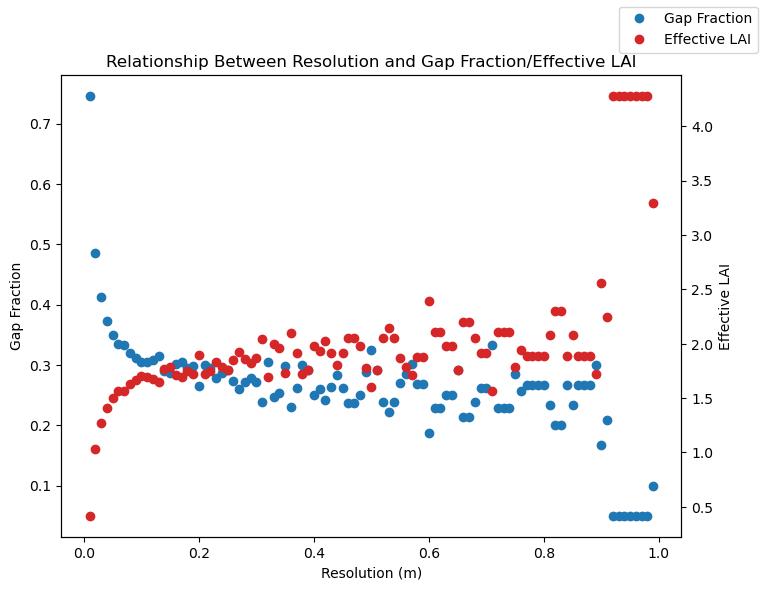

In [14]:
res = np.arange(0.01, 1.0, 0.01)
print("When the G is 0.7")
plot_lai_and_gf_area(data, res, 0.7)

When the G is 0.7


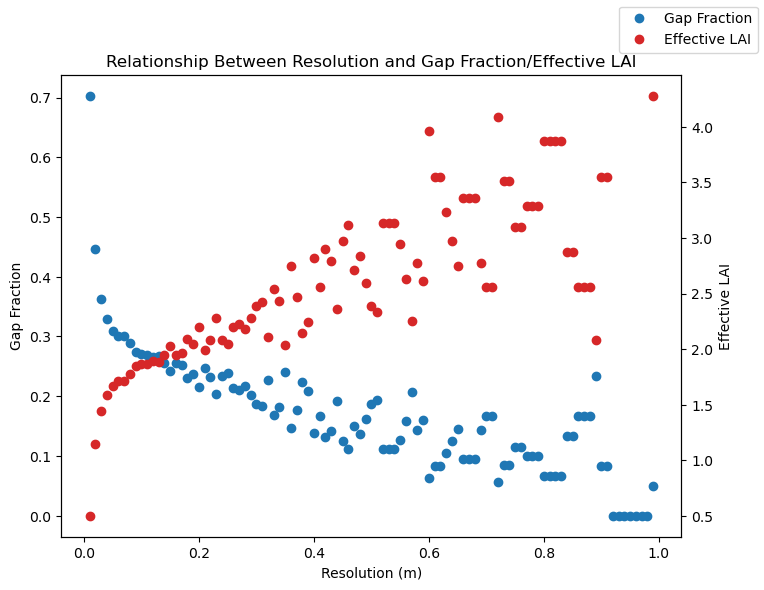

In [15]:
res = np.arange(0.01, 1.0, 0.01)
print("When the G is 0.7")
plot_res_GFandeLAI(data, res, 0.7)

In [16]:
data1 = np.loadtxt("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree1.txt", usecols=(0, 1, 2))
print("finished!")

data2 = np.loadtxt("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree2.txt", usecols=(0, 1, 2))
print("finished!")

data3 = np.loadtxt("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree3.txt", usecols=(0, 1, 2))
print("finished!")

finished!
finished!
finished!


When the G is 1.0


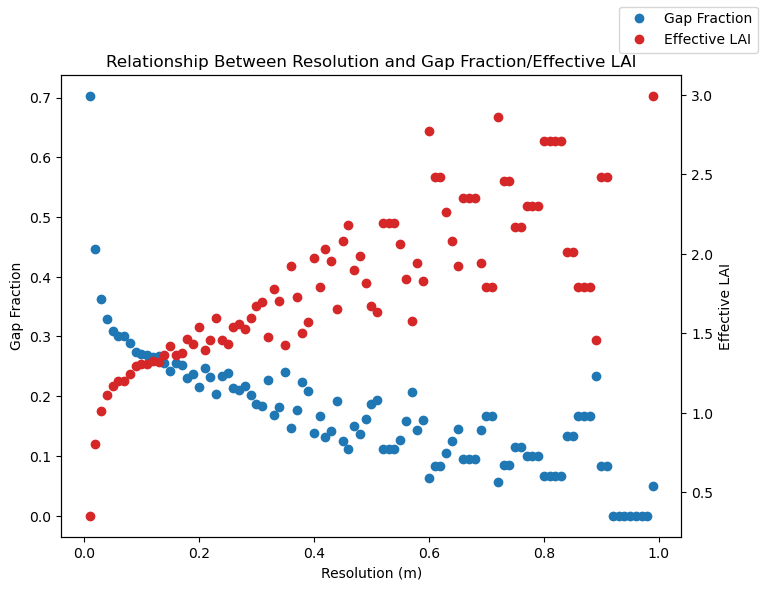

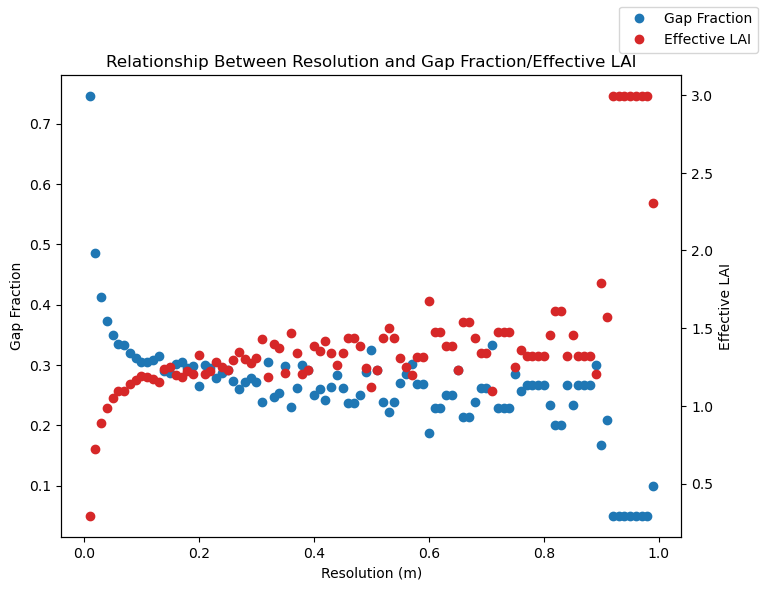

In [17]:
res = np.arange(0.01, 1.0, 0.01)
print("When the G is 1.0")
plot_res_GFandeLAI(data1, res, 1.0)
plot_lai_and_gf_area(data1, res, 1.0)

When the G is 1.0


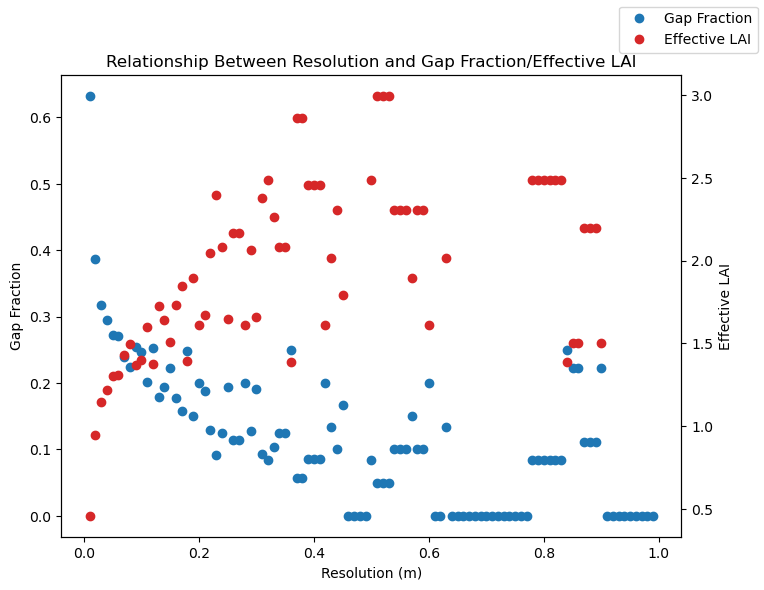

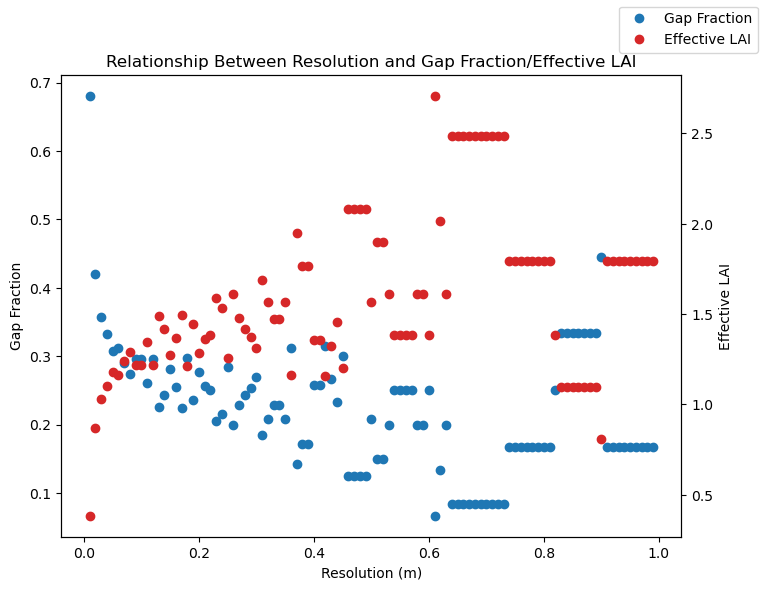

In [18]:
res = np.arange(0.01, 1.0, 0.01)
print("When the G is 1.0")
plot_res_GFandeLAI(data2, res, 1.0)
plot_lai_and_gf_area(data2, res, 1.0)

When the G is 1.0


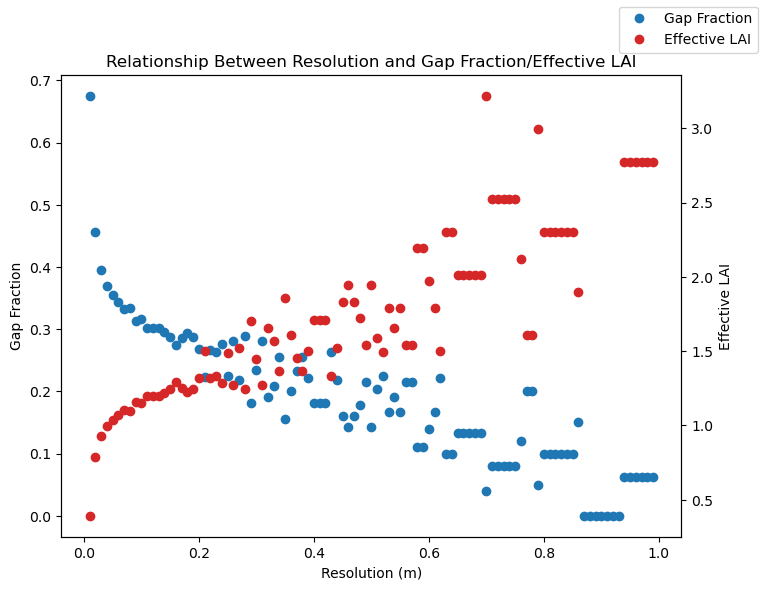

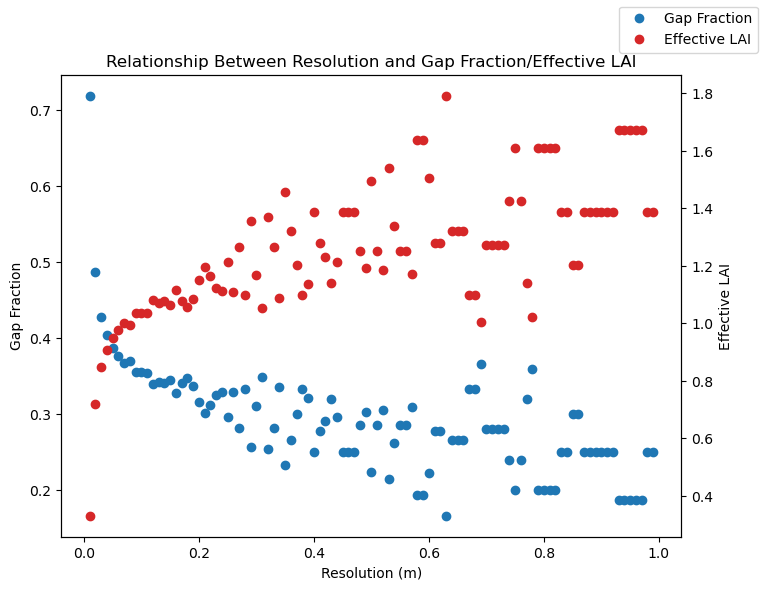

In [19]:
res = np.arange(0.01, 1.0, 0.01)
print("When the G is 1.0")
plot_res_GFandeLAI(data3, res, 1.0)
plot_lai_and_gf_area(data3, res, 1.0)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_lai_and_gf_area_width(data, res, G,wid):
    # G is the extinction coefficient
    # Compute X and Y limits
    X_min, X_max = np.min(data[:, 0]), np.max(data[:, 0])
    Y_min, Y_max = np.min(data[:, 1]), np.max(data[:, 1])

    # Compute gap fraction and effective LAI for different resolutions
    gf = np.zeros_like(res)
    eLAI = np.zeros_like(res)
    for i, r in enumerate(res):
        X_length = int(np.ceil((X_max - X_min) / r))
        Y_length = int(np.ceil((Y_max - Y_min) / r))
        GF_map = np.zeros((X_length, Y_length))
        x = data[:, 0]
        y = data[:, 1]
        x_min = x - wid
        x_min[x_min < X_min] = X_min
        x_max = x + wid
        x_max[x_max > X_max] = X_max
        y_min = y - wid
        y_min[y_min < Y_min] = Y_min
        y_max = y + wid
        y_max[y_max > Y_max] = Y_max
        X_cor_min = np.floor((x_min - X_min) / r).astype(int)
        X_cor_max = np.floor((x_max - X_min) / r).astype(int)
        Y_cor_min = np.floor((y_min - Y_min) / r).astype(int)
        Y_cor_max = np.floor((y_max - Y_min) / r).astype(int)

        for j in range(data.shape[0]):
            for ix in range(X_cor_min[j], X_cor_max[j]+1):
                for iy in range(Y_cor_min[j], Y_cor_max[j]+1):
                    if ix >= 0 and ix < X_length and iy >= 0 and iy < Y_length:
                        dx = min(abs(ix*r + X_min - x[j]), r/2)
                        dy = min(abs(iy*r + Y_min - y[j]), r/2)
                        if dx*dx + dy*dy <= r*r/4:
                            GF_map[ix, iy] = 1

        gf[i] = 1 - np.sum(GF_map) / (X_length * Y_length)
        eLAI[i] = -math.log(gf[i]) / (G)

    # Plot gap fraction and effective LAI versus resolution
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.plot(res, gf, 'o', label='Gap Fraction')
    ax.set_xlabel('Resolution (m)')
    ax.set_ylabel('Gap Fraction')
    ax2 = ax.twinx()
    ax2.plot(res, eLAI, 'o', color='tab:red', label='Effective LAI')
    ax2.set_ylabel('Effective LAI')
    ax2.set_title('Relationship Between Resolution and Gap Fraction/Effective LAI')
    fig.legend()
    plt.show()

When the G is  1.0  and point area is  0.01  *  0.01


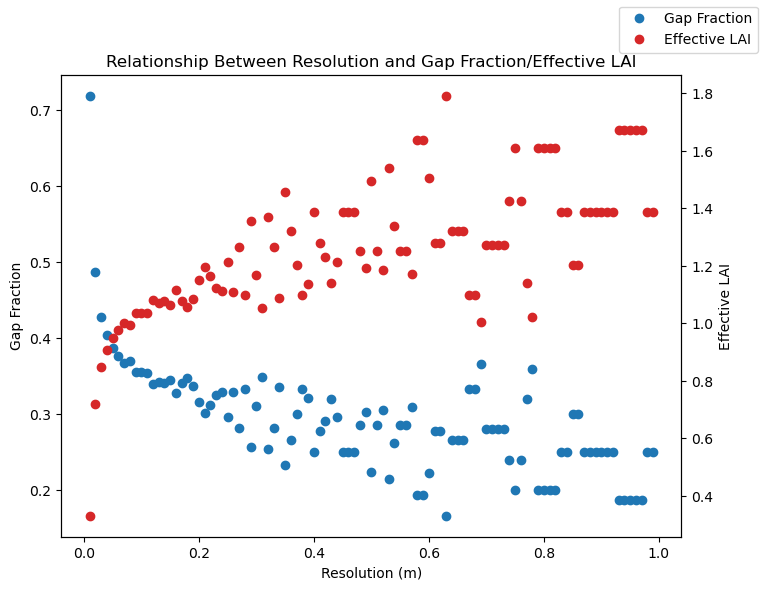

When the G is  1.0  and point area is  0.02  *  0.02


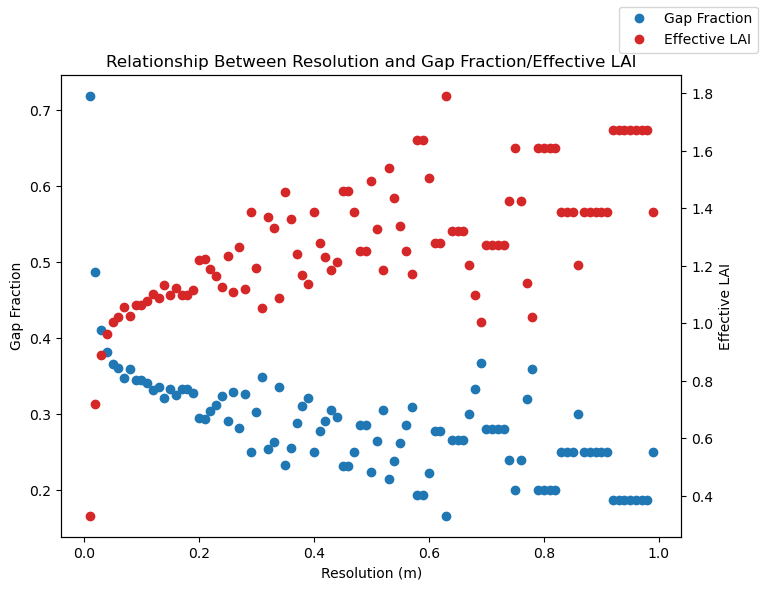

When the G is  1.0  and point area is  0.03  *  0.03


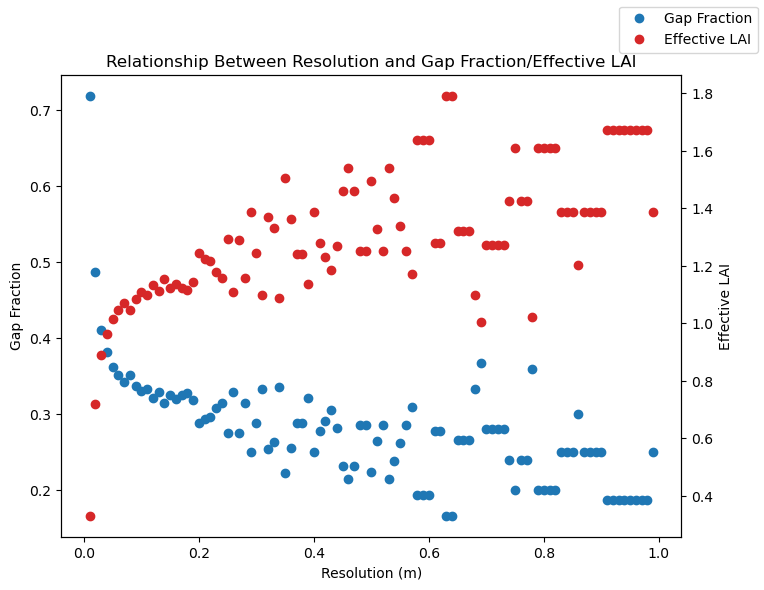

When the G is  1.0  and point area is  0.04  *  0.04


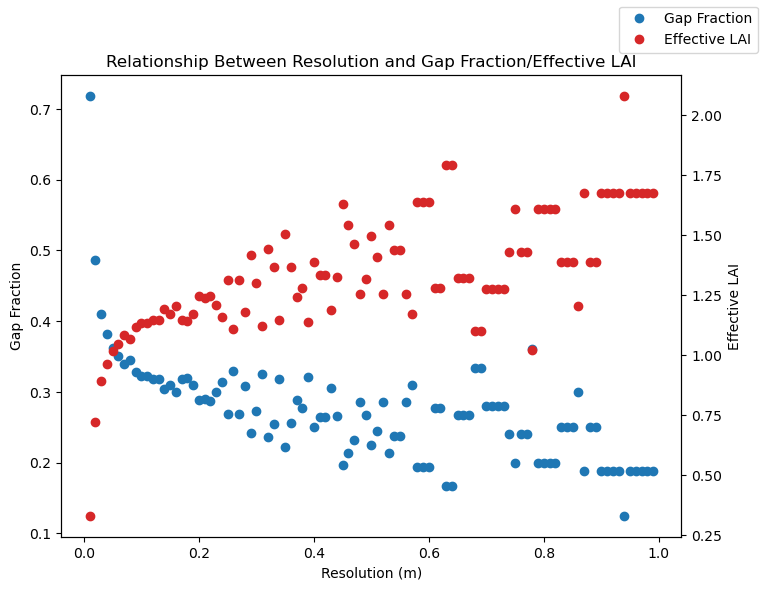

When the G is  1.0  and point area is  0.05  *  0.05


KeyboardInterrupt: 

In [21]:
res = np.arange(0.01, 1.0, 0.1)
G = 1.0

for w in range(1,10):
    width = w*0.01
    print("When the G is ",G," and point area is ",width," * ",width)
    plot_lai_and_gf_area_width(data3, res, 1.0, width)

When the G is 1.0


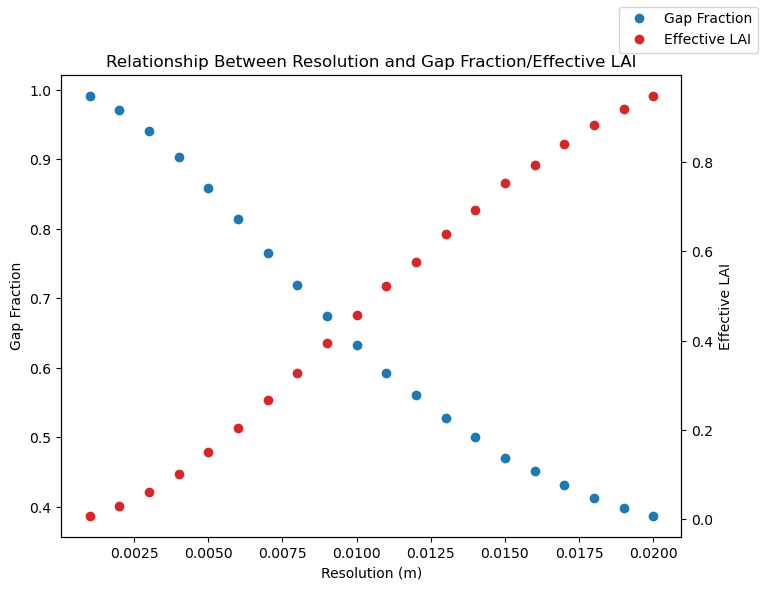

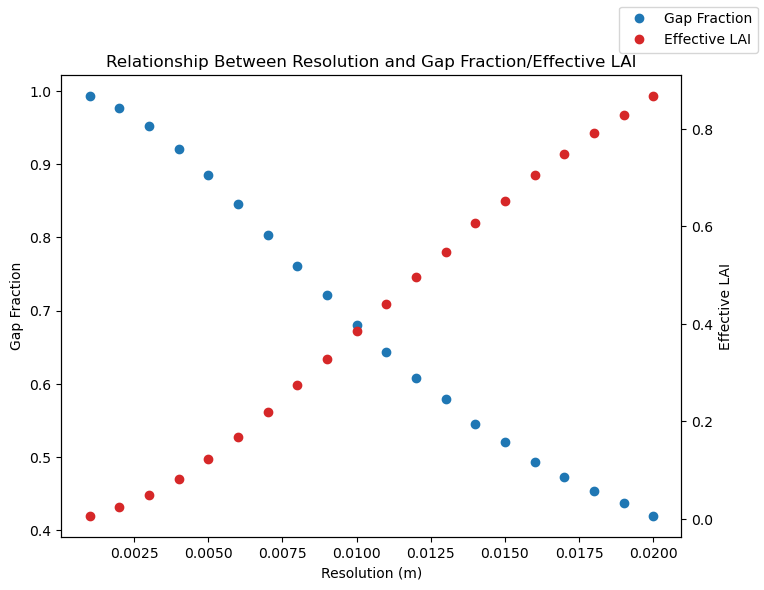

In [22]:
res = np.linspace(0.001, 0.02, num=20)
print("When the G is 1.0")
plot_res_GFandeLAI(data2, res, 1.0)
plot_lai_and_gf_area(data2, res, 1.0)

When the G is 1.0


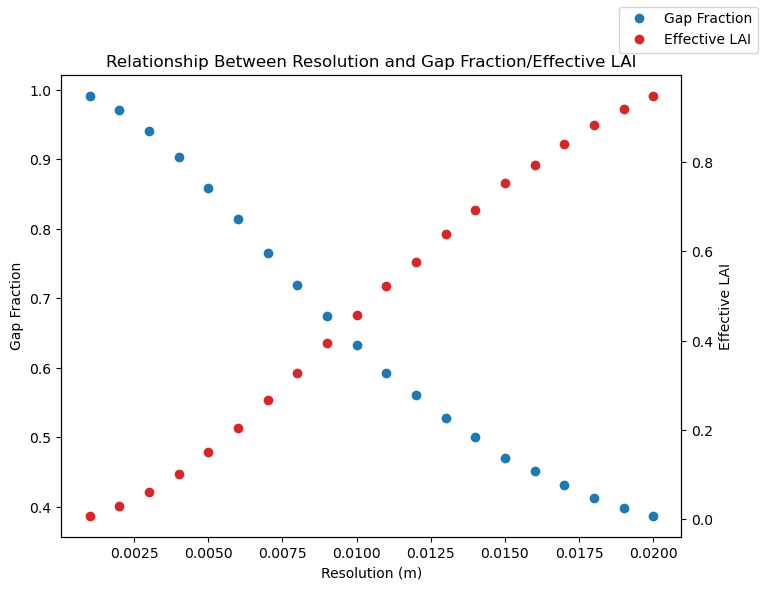

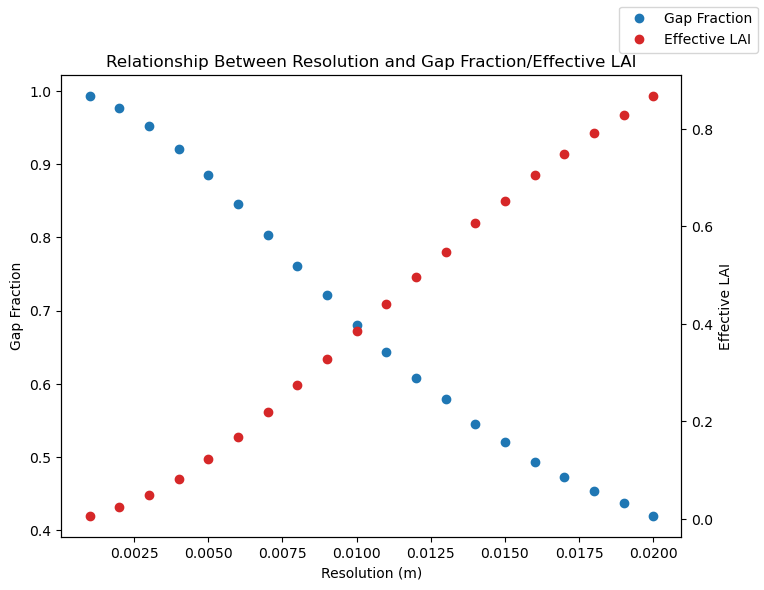

In [23]:
res = np.linspace(0.001, 0.02, num=20)
print("When the G is 1.0")
plot_res_GFandeLAI(data2, res, 1.0)
plot_lai_and_gf_area(data2, res, 1.0)

When the G is 1.0


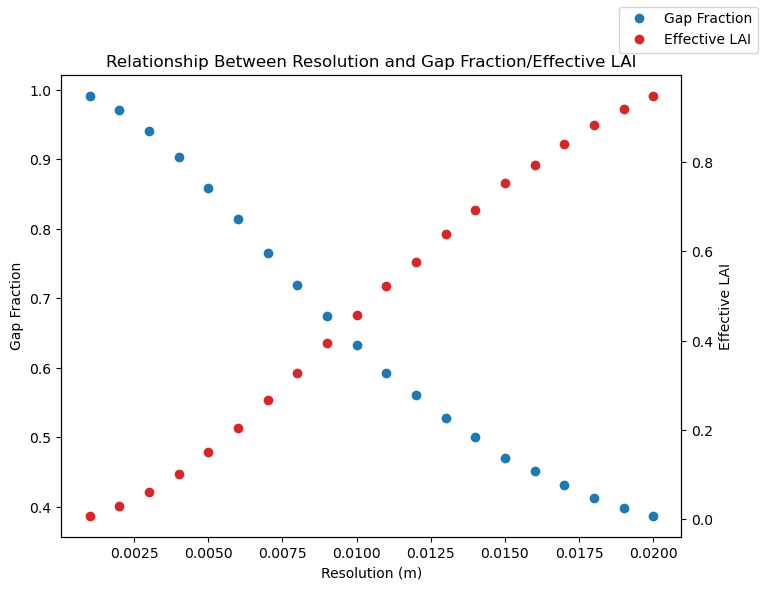

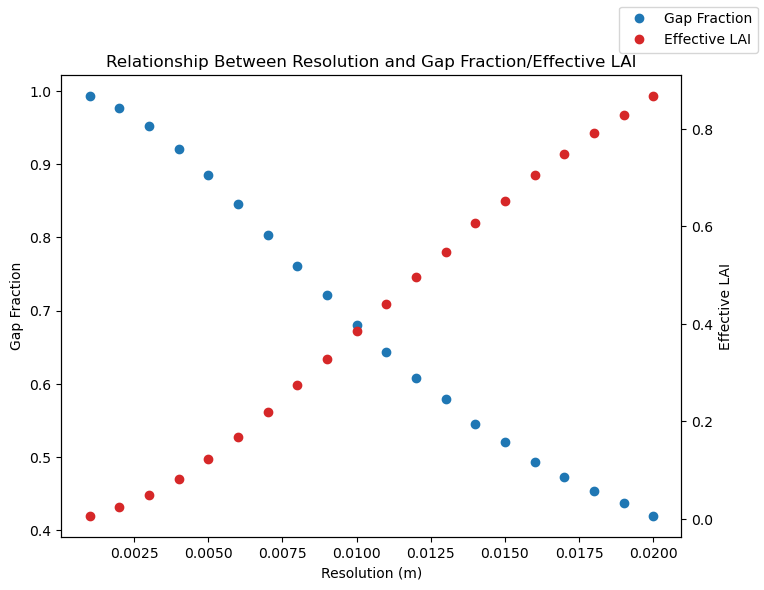

In [24]:
res = np.linspace(0.001, 0.02, num=20)
print("When the G is 1.0")
plot_res_GFandeLAI(data2, res, 1.0)
plot_lai_and_gf_area(data2, res, 1.0)

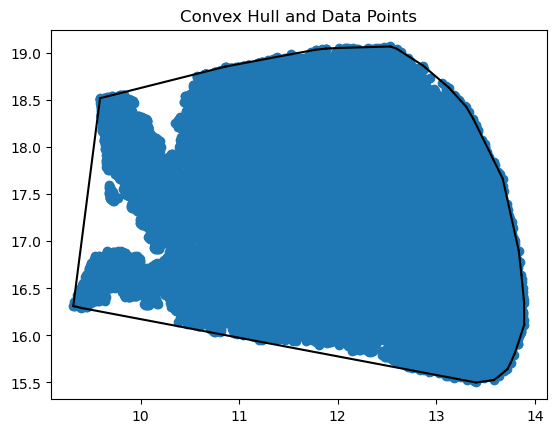

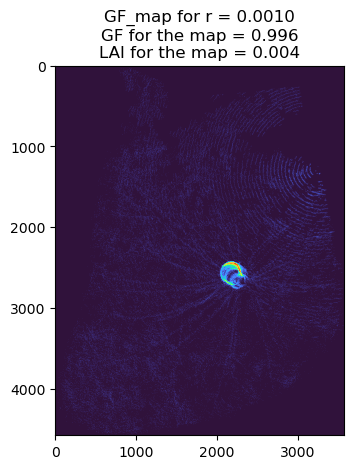

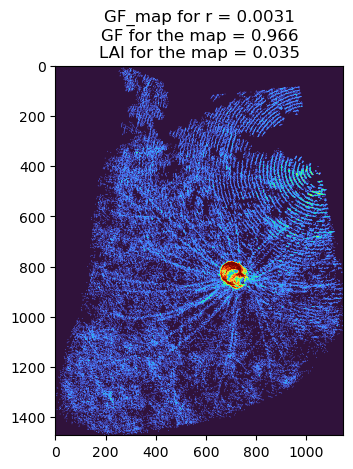

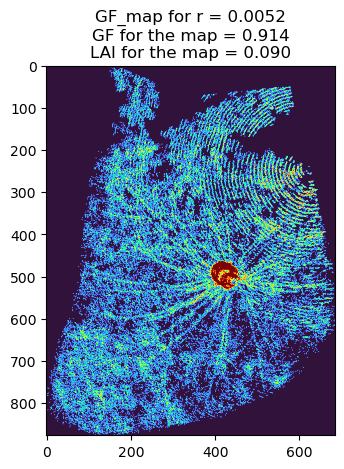

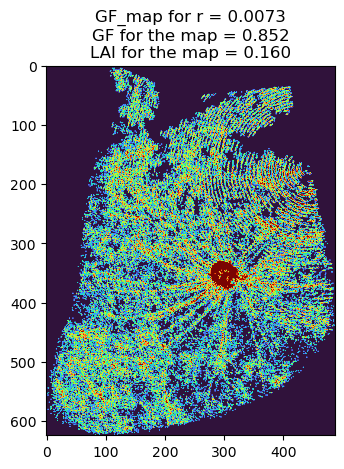

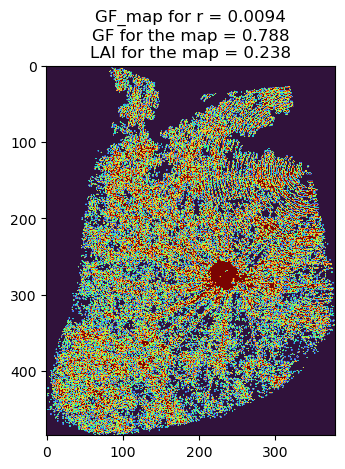

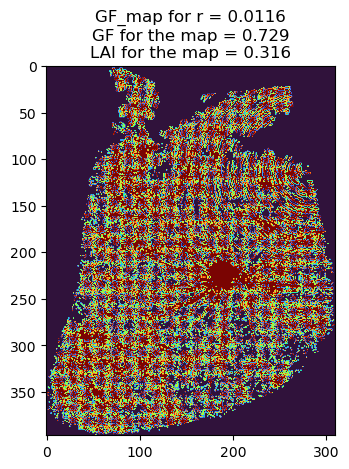

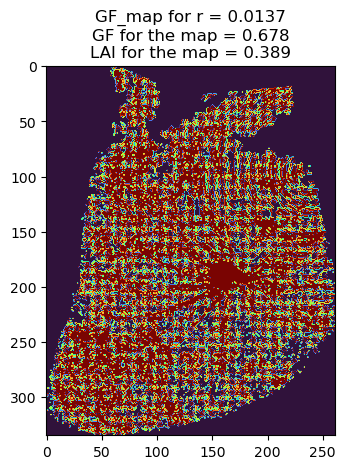

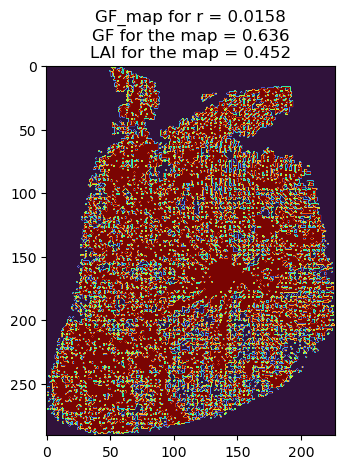

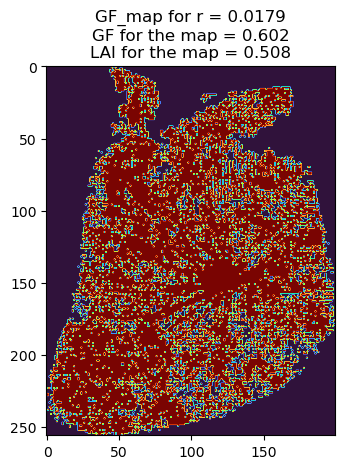

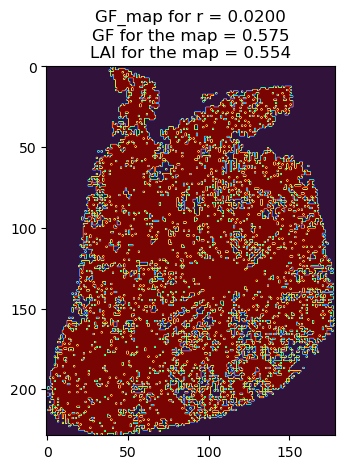

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

res = np.linspace(0.001, 0.02, num=10)
gf = np.zeros_like(res)
eLAI = np.zeros_like(res)

data = np.loadtxt("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree1.txt", usecols=(0, 1, 2))
data2D = np.loadtxt("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree1.txt", usecols=(0, 1))

hull = ConvexHull(data2D)
area = 0.5 * np.abs(np.dot(hull.points[hull.vertices, 0], np.roll(hull.points[hull.vertices, 1], 1)) - 
                    np.dot(hull.points[hull.vertices, 1], np.roll(hull.points[hull.vertices, 0], 1)))

plt.plot(data2D[:, 0], data2D[:, 1], 'o')
for simplex in hull.simplices:
    plt.plot(data2D[simplex, 0], data2D[simplex, 1], 'k-')
plt.title('Convex Hull and Data Points')
plt.show()

for i, r in enumerate(res):
    X_length = int(np.ceil((X_max - X_min) / r))
    Y_length = int(np.ceil((Y_max - Y_min) / r))
    GF_map = np.zeros((X_length, Y_length))
    X_cor = np.floor((data[:, 0] - X_min) / r).astype(int)
    Y_cor = np.floor((data[:, 1] - Y_min) / r).astype(int)
    GF_map[X_cor, Y_cor] = 1
    gf[i] = 1 - np.sum(GF_map) / (X_length * Y_length)*(area/((X_max - X_min)*(Y_max - Y_min)))
    eLAI[i] = -math.log(gf[i])
    plt.imshow(GF_map, cmap='turbo')
    plt.title('GF_map for r = {:.4f}\nGF for the map = {:.3f}\nLAI for the map = {:.3f}'.format(r, gf[i], eLAI[i]))
    plt.show()

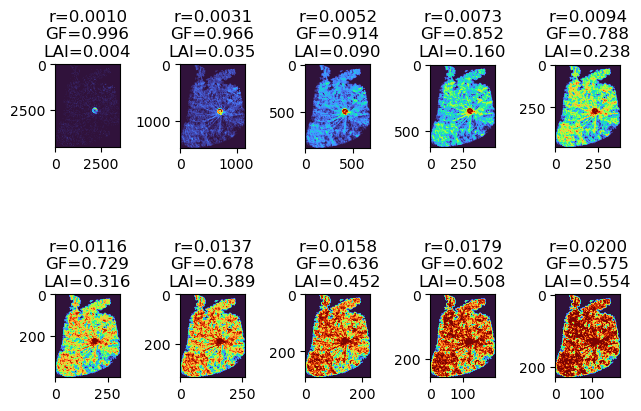

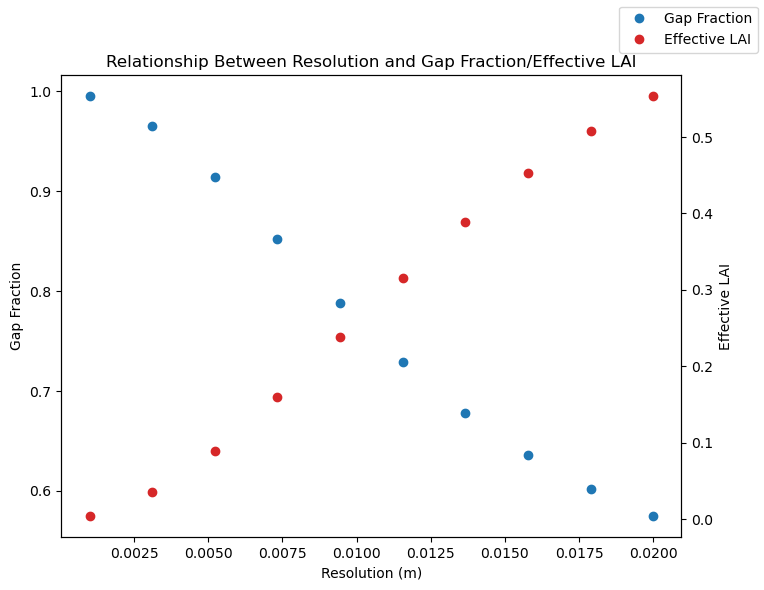

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import math

# Load the data
data = np.loadtxt("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree1.txt", usecols=(0, 1, 2))
data2D = np.loadtxt("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree1.txt", usecols=(0, 1))

# Compute the convex hull
hull = ConvexHull(data2D)
area = 0.5 * np.abs(np.dot(hull.points[hull.vertices, 0], np.roll(hull.points[hull.vertices, 1], 1)) - 
                    np.dot(hull.points[hull.vertices, 1], np.roll(hull.points[hull.vertices, 0], 1)))

# Define the X and Y limits
X_min, Y_min = np.min(data2D, axis=0)
X_max, Y_max = np.max(data2D, axis=0)

# Compute gap fraction and eLAI for each resolution
res = np.linspace(0.001, 0.02, num=10)
gf = np.zeros_like(res)
eLAI = np.zeros_like(res)

fig, axes = plt.subplots(nrows=2, ncols=5, dpi = 100)
for i, r in enumerate(res):
    X_length = int(np.ceil((X_max - X_min) / r))
    Y_length = int(np.ceil((Y_max - Y_min) / r))
    GF_map = np.zeros((X_length, Y_length))
    X_cor = np.floor((data[:, 0] - X_min) / r).astype(int)
    Y_cor = np.floor((data[:, 1] - Y_min) / r).astype(int)
    GF_map[X_cor, Y_cor] = 1
    gf[i] = 1 - np.sum(GF_map) / (X_length * Y_length)*(area/((X_max - X_min)*(Y_max - Y_min)))
    eLAI[i] = -math.log(gf[i])
    ax = axes[i // 5, i % 5]
    ax.imshow(GF_map, cmap='turbo')
    ax.set_title('r={:.4f}\nGF={:.3f}\nLAI={:.3f}'.format(r, gf[i], eLAI[i]))
plt.tight_layout()
plt.show()

# Plot gap fraction and effective LAI versus resolution
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.plot(res, gf, 'o', label='Gap Fraction')
ax.set_xlabel('Resolution (m)')
ax.set_ylabel('Gap Fraction')
ax2 = ax.twinx()
ax2.plot(res, eLAI, 'o', color='tab:red', label='Effective LAI')
ax2.set_ylabel('Effective LAI')
ax2.set_title('Relationship Between Resolution and Gap Fraction/Effective LAI')
fig.legend()
plt.show()

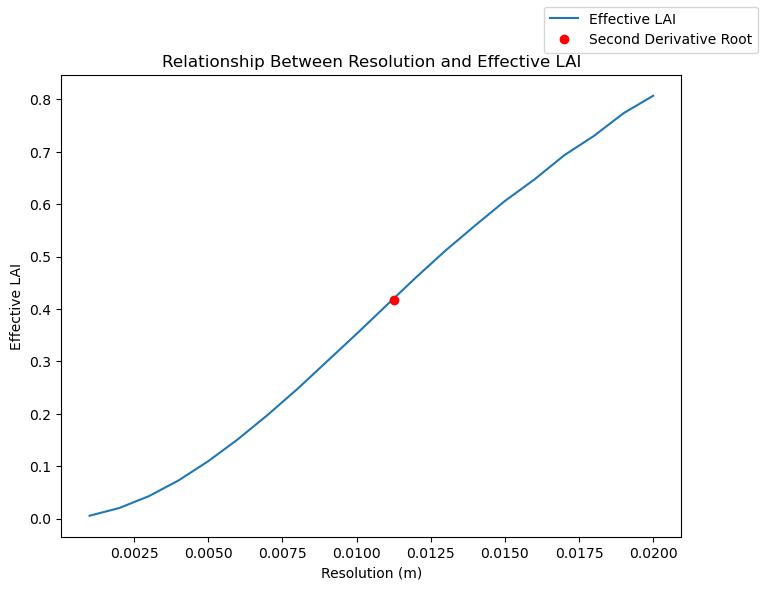

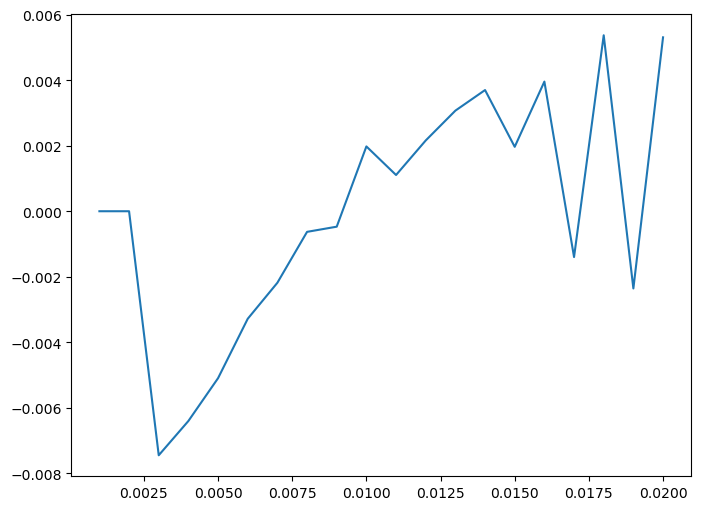

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import math

# Load the data
data = np.loadtxt("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree1.txt", usecols=(0, 1, 2))
data2D = np.loadtxt("H:\\ondalabLiDARdata\\Single Tree LAI\\whole_tree\\tree1.txt", usecols=(0, 1))

# Compute the convex hull
hull = ConvexHull(data2D)
area = 0.5 * np.abs(np.dot(hull.points[hull.vertices, 0], np.roll(hull.points[hull.vertices, 1], 1)) - 
                    np.dot(hull.points[hull.vertices, 1], np.roll(hull.points[hull.vertices, 0], 1)))

# Define the X and Y limits
X_min, Y_min = np.min(data2D, axis=0)
X_max, Y_max = np.max(data2D, axis=0)

# Compute gap fraction and eLAI for each resolution
res = np.linspace(0.001, 0.02, num=20)
gf = np.zeros_like(res)
eLAI = np.zeros_like(res)
dgf = np.zeros_like(res)
ddgf = np.zeros_like(res)

#fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20,10), dpi = 100)
for i, r in enumerate(res):
    X_length = int(np.ceil((X_max - X_min) / r))
    Y_length = int(np.ceil((Y_max - Y_min) / r))
    GF_map = np.zeros((X_length, Y_length))
    X_cor = np.floor((data[:, 0] - X_min) / r).astype(int)
    Y_cor = np.floor((data[:, 1] - Y_min) / r).astype(int)
    GF_map[X_cor, Y_cor] = 1
    gf[i] = 1 - np.sum(GF_map) / (X_length * Y_length)
    if i >0 :
        dgf[i] = gf[i]-gf[i-1]
    if i >1 :
        ddgf[i] = dgf[i]-dgf[i-1]
    eLAI[i] = -math.log(gf[i])


# Fit a second-order polynomial to the eLAI data
p = np.polyfit(res, eLAI, 3)

# Compute the second derivative of the polynomial
dp = np.polyder(p)
d2p = np.polyder(dp)

# Find the roots of the second derivative
roots = np.roots(d2p)

# Plot the fitted curve and the point(s) where second derivative is zero
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.plot(res, eLAI, '-', label='Effective LAI')
#ax.plot(res, fitted_curve, label='Fitted Curve')
ax.plot(roots, np.polyval(p, roots), 'ro', label='Second Derivative Root')
ax.set_xlabel('Resolution (m)')
ax.set_ylabel('Effective LAI')
ax.set_title('Relationship Between Resolution and Effective LAI')
fig.legend()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.plot(res, ddgf, label='dgf')
plt.show()
